## Estimation of empirical correlation from covariance matrix
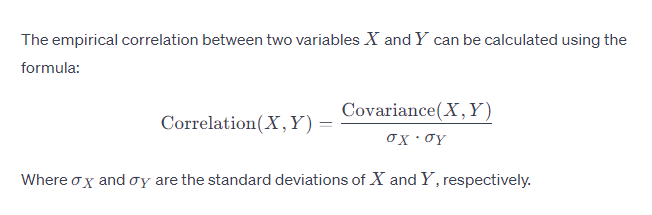
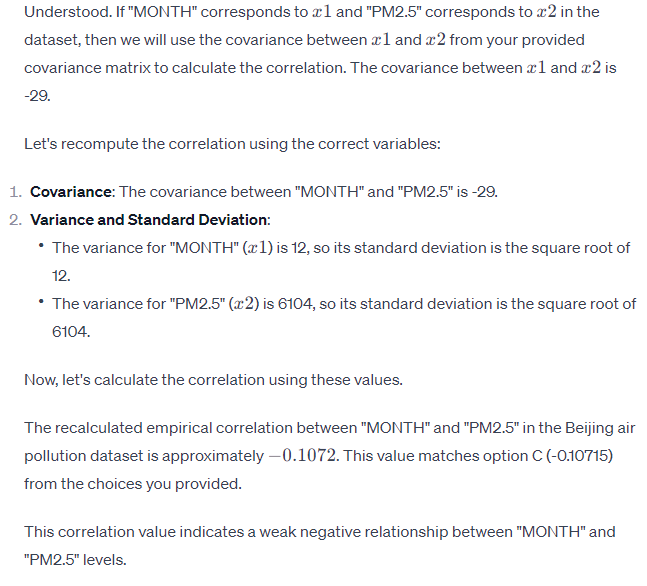

In [2]:
import numpy as np
# Updated values for MONTH (x1) and PM2.5 (x2)
covariance_month_pm25 = -29  # Covariance between MONTH and PM2.5
variance_pm25 = 6104  # Variance of PM2.5
variance_month = 12  # Variance of Month

# Standard deviation of PM2.5
std_dev_month = np.sqrt(variance_month)
std_dev_pm25 = np.sqrt(variance_pm25)

# Recalculating the correlation
correlation_month_pm25 = covariance_month_pm25 / (std_dev_month * std_dev_pm25)
correlation_month_pm25


-0.10715195825624312

## Jaccard Similarity - overlapping of observations
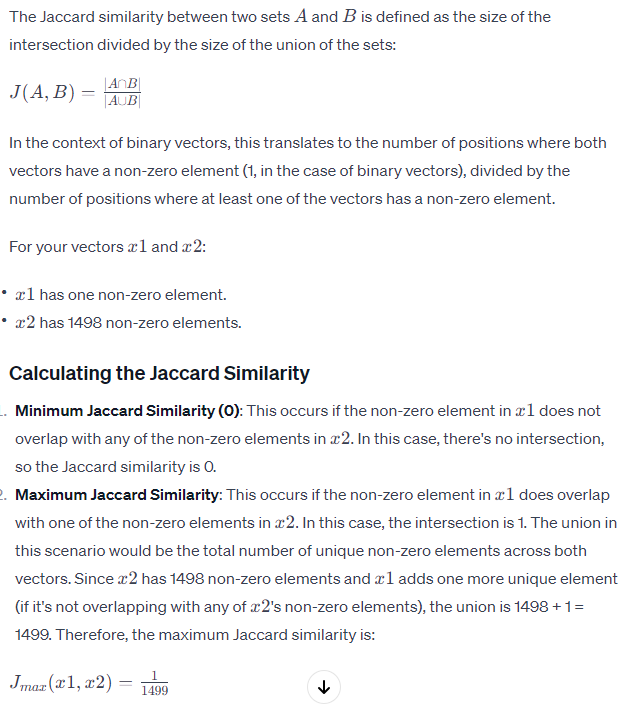

## Q13: ROC curve prediction from class probability - logisitic regression
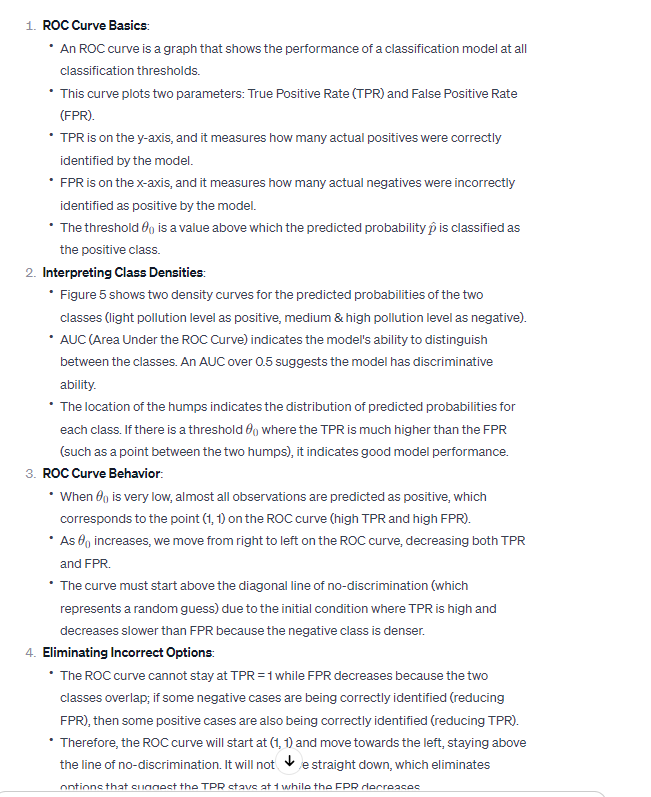
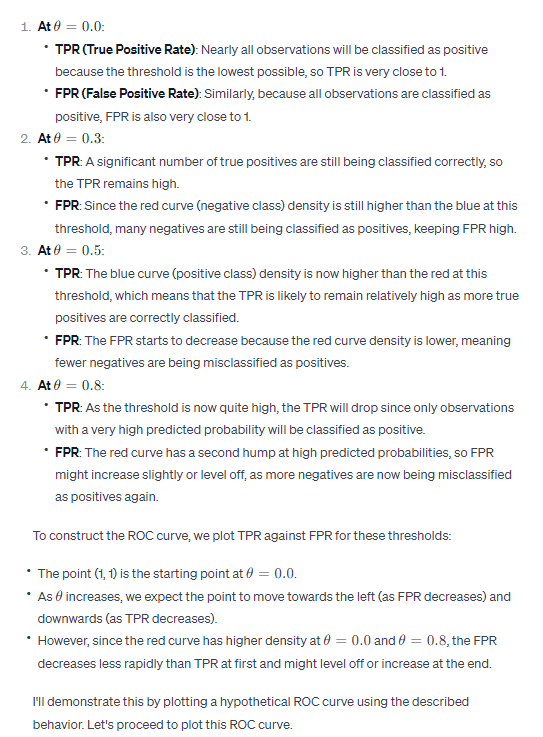

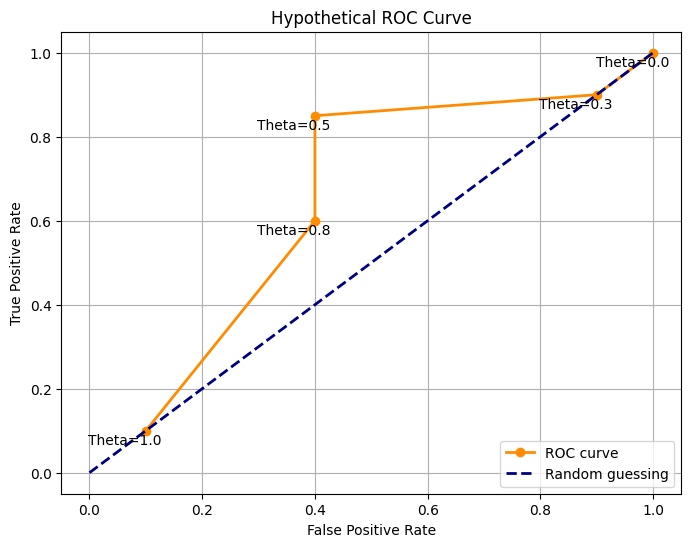

In [3]:
import matplotlib.pyplot as plt

# Sample TPR and FPR values at different theta values based on the explanation given
theta_values = [0.0, 0.3, 0.5, 0.8, 1.0]  # Example theta values
tpr_values = [1.0, 0.9, 0.85, 0.6, 0.1]  # Hypothetical TPR values based on the class densities
fpr_values = [1.0, 0.9, 0.4, 0.4, 0.1]  # Hypothetical FPR values based on the class densities

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, marker='o', color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guessing')

# Annotating the theta points
for i, theta in enumerate(theta_values):
    plt.annotate(f'Theta={theta}', (fpr_values[i], tpr_values[i]), textcoords="offset points", xytext=(-15,-10), ha='center')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hypothetical ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Calculation of cost function - Ridge Regression
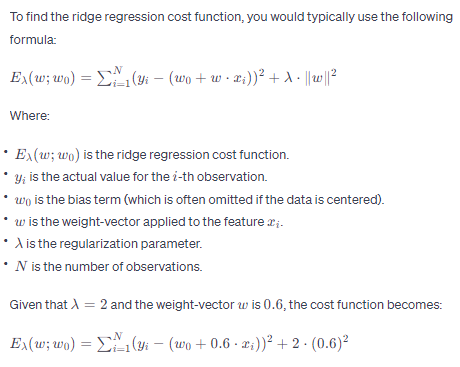

In [4]:
import numpy as np

# Given actual and predicted y values
y_actual = np.array([6, 7, 7, 9])
y_pred = np.array([6.417, 7.25, 7.528, 7.805])

# Regularization parameter
lambda_reg = 2

# Weight vector w
w = np.array([0.6])

# Calculate the sum of squared errors
squared_errors = np.sum((y_actual - y_pred) ** 2)

# Calculate the regularization term
regularization_term = lambda_reg * np.dot(w.T, w)

# Calculate the ridge regression cost function
ridge_cost = squared_errors + regularization_term
ridge_cost


2.6631980000000004

## Decision Tree - Predicted value at an observation
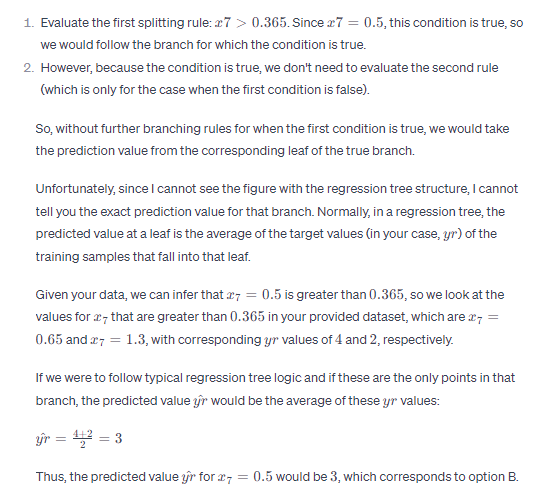

## Estimated difference in Accuracy - McNemars Test
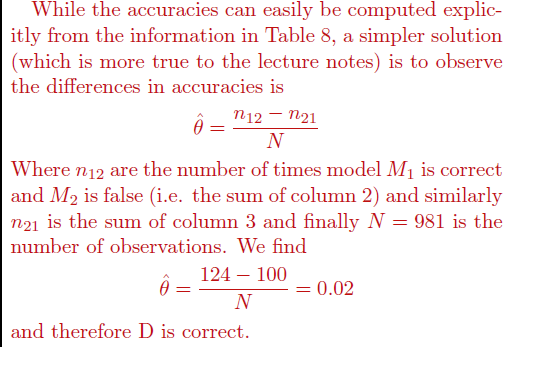

In [5]:
# Data from the table
# M1 correct, M2 wrong (M1≠M2)
b = [40, 31, 23, 30]  # Sum across folds where M1 is correct and M2 is wrong

# M2 correct, M1 wrong (M2≠M1)
c = [24, 26, 25, 25]  # Sum across folds where M2 is correct and M1 is wrong

# Summing across all folds
total_b = sum(b)
total_c = sum(c)

# McNemar test statistic
mcnemar_statistic = (total_b - total_c) ** 2 / (total_b + total_c)
mcnemar_statistic


2.5714285714285716

In [6]:
# Data from each fold
folds_data = np.array([
    [134, 40, 24, 47],  # Fold 1
    [141, 31, 26, 48],  # Fold 2
    [131, 23, 25, 66],  # Fold 3
    [132, 30, 25, 58]   # Fold 4
])

# Calculate total observations for each fold
total_observations_per_fold = np.sum(folds_data, axis=1)

# Calculate accuracies for M1 and M2
# acc(M1) = (M1=M2 + M1≠M2) / Total Observations
# acc(M2) = (M1=M2 + M2≠M1) / Total Observations
acc_M1 = (folds_data[:, 0] + folds_data[:, 1]) / total_observations_per_fold
acc_M2 = (folds_data[:, 0] + folds_data[:, 2]) / total_observations_per_fold

# Average accuracies across all folds
avg_acc_M1 = np.mean(acc_M1)
avg_acc_M2 = np.mean(acc_M2)

# Estimated difference in accuracy
delta_hat = avg_acc_M1 - avg_acc_M2
delta_hat


0.024469055915048887

## Jeffrey's confidence interval ANN

In [7]:
from scipy.stats import beta

# Data from each fold
folds_data = np.array([
    [134, 40, 24, 47],  # Fold 1
    [141, 31, 26, 48],  # Fold 2
    [131, 23, 25, 66],  # Fold 3
    [132, 30, 25, 58]   # Fold 4
])


# Data from each fold for model M2
# Successes: M1=M2 (Both Correct) + M2≠M1 (M2 Correct, M1 Wrong)
successes = np.sum(folds_data[:, [0, 2]])

# Failures: M1≠M2 (M1 Correct, M2 Wrong) + M1=M2 (Both Wrong)
failures = np.sum(folds_data[:, [1, 3]])

# Parameters for Jeffrey's interval
a = successes + 0.5
b = failures + 0.5

# Calculating the Jeffrey's confidence interval
lower_bound = beta.ppf(0.025, a, b)
upper_bound = beta.ppf(0.975, a, b)

lower_bound, upper_bound
a,b

(638.5, 343.5)

## Q21: estimate of the generalization error 
- generalization error E(σ) for a Kernel Density Estimator (KDE) using Gaussian kernels
- cross validation curve estimate

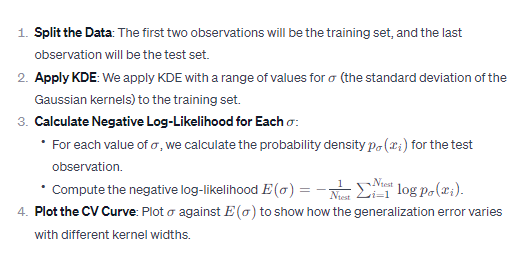

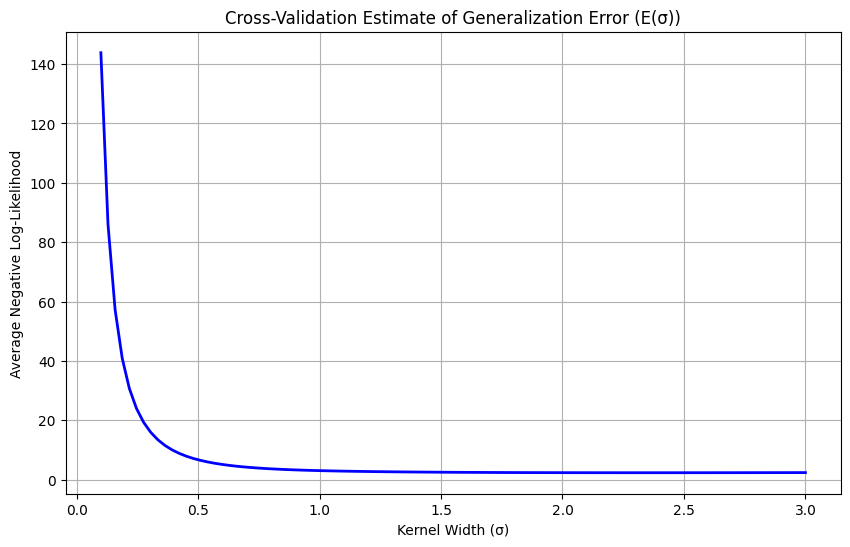

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Data
x_train = np.array([4.5, -0.5])  # Training set
x_test = np.array([1.2])         # Test set

# Range of sigma values to try
sigma_values = np.linspace(0.1, 3, 100)

# Function to calculate negative log-likelihood
def negative_log_likelihood(sigma, x_train, x_test):
    # KDE for each point in x_test
    likelihoods = np.array([np.mean(norm.pdf(x, loc=x_train, scale=sigma)) for x in x_test])
    # Avoid log(0) by adding a small constant
    likelihoods[likelihoods == 0] = 1e-10
    # Negative log-likelihood
    return -np.log(likelihoods).mean()

# Calculating negative log-likelihood for each sigma
nll = [negative_log_likelihood(sigma, x_train, x_test) for sigma in sigma_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, nll, color='blue', lw=2)
plt.xlabel('Kernel Width (σ)')
plt.ylabel('Average Negative Log-Likelihood')
plt.title('Cross-Validation Estimate of Generalization Error (E(σ))')
plt.grid(True)
plt.show()


## Q23: Naive Bayes with observations given
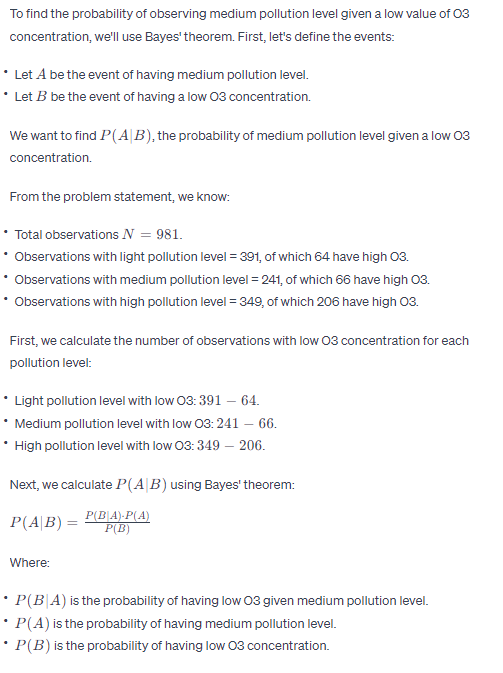

In [14]:
# Number of observations with different pollution levels
N = 981
N_light = 391
N_medium = 241
N_high = 349

# Number of observations with high O3 concentration in each pollution level
high_O3_light = 64
high_O3_medium = 66
high_O3_high = 206

# Calculating the number of observations with low O3 concentration
low_O3_light = N_light - high_O3_light
low_O3_medium = N_medium - high_O3_medium
low_O3_high = N_high - high_O3_high

# Total number of observations with low O3 concentration
total_low_O3 = low_O3_light + low_O3_medium + low_O3_high

# Probability of medium pollution level (P(A))
P_A = N_medium / N

# Probability of low O3 given medium pollution level (P(B|A))
P_B_given_A = low_O3_medium / N_medium

# Probability of low O3 concentration (P(B))
P_B = total_low_O3 / N

# Calculating P(A|B) using Bayes' theorem
P_A_given_B = (P_B_given_A * P_A) / P_B
P_A_given_B


0.2713178294573643

## Multinomial Regression - Class Assignment probability vector
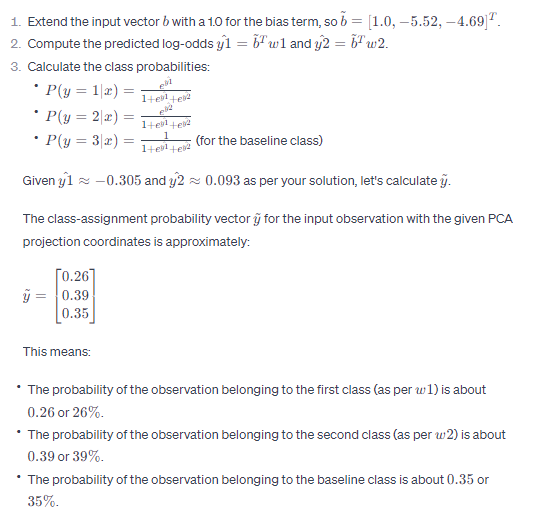

In [15]:
# Given weight vectors and input coordinates
w1 = np.array([0.04, 1.32, -1.48])
w2 = np.array([-0.03, 0.7, -0.85])
b = np.array([1.0, -5.52, -4.69])  # Input vector (including bias term)

# Calculate the predicted log-odds
y1_hat = np.dot(w1, b)
y2_hat = np.dot(w2, b)

# Compute the class probabilities using the softmax function
exp_y1_hat = np.exp(y1_hat)
exp_y2_hat = np.exp(y2_hat)
denominator = 1 + exp_y1_hat + exp_y2_hat

P_y1_given_x = exp_y1_hat / denominator
P_y2_given_x = exp_y2_hat / denominator
P_y3_given_x = 1 / denominator  # Probability for the baseline class

# Class-assignment probability vector
y_tilde = np.array([P_y1_given_x, P_y2_given_x, P_y3_given_x])
y_tilde


array([0.26005815, 0.38706989, 0.35287196])

## K-mean cluster convergence - Center Centroid center centre
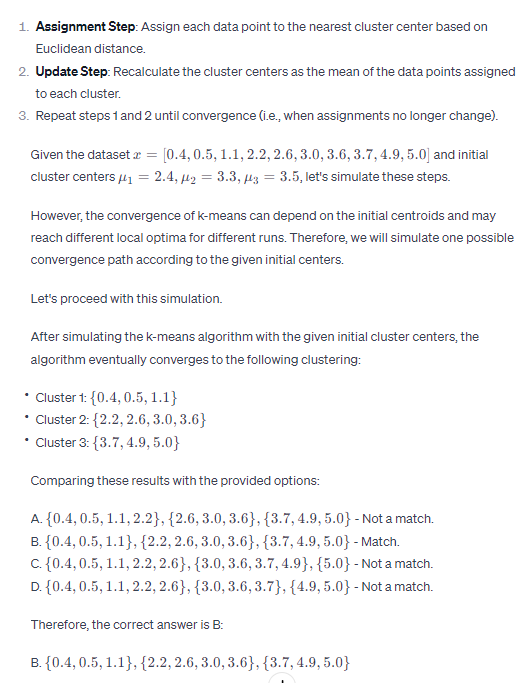

In [16]:
from sklearn.cluster import KMeans

# Data
x = np.array([0.4, 0.5, 1.1, 2.2, 2.6, 3.0, 3.6, 3.7, 4.9, 5.0]).reshape(-1, 1)

# Initial centroids
initial_centers = np.array([2.4, 3.3, 3.5]).reshape(-1, 1)

# K-means with K=3, initialized with given centroids
kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, max_iter=300)
kmeans.fit(x)

# Clusters after convergence
clusters = {i: x[kmeans.labels_ == i].flatten() for i in range(3)}

clusters


{0: array([0.4, 0.5, 1.1]),
 1: array([2.2, 2.6, 3. , 3.6]),
 2: array([3.7, 4.9, 5. ])}